<a href="https://colab.research.google.com/github/GKS07/Clustering/blob/main/Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = 'skyblue'><h1>Bank Customer Segmentation.</h1></font>

In this project, I will be performing an unsupervised clustering of data on the customer's  transaction records.<br>
Customer segmentation in banking is the process of dividing a bank's customer base into groups with similar characteristics, needs, and behaviors.<br>
This helps banks tailor their products, services, communication, and marketing strategies to specific customer segments.
<br><br>

**Customer segmentation can help banks:** <br>

*   **Personalize offerings:**
    Banks can offer more tailored products and services to their customers.

*   **Optimize operations:**
    Banks can identify and analyze different customer groups to optimize their operations.

*   **Maximize profitability:**

    Banks can maximize profitability by understanding and anticipating their customers' needs.

*   **Build stronger relationships:**
    Banks can build stronger, more productive relationships with their customers.

Some basic segmentation criteria include:
<br>
**geography, income, spending habits, age, gender, generation, and marital status.**

<font color = 'skyblue'> <h2>Downloading Data</h2> </font>

<font color = 'skyblue'><b>About Dataset</b></font><br>
This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as -<br> customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.

In [ ]:
# uploading the kaggle jason file

from google.colab import files
files.upload()

# copying the kaggle file

!mkdir ~/.kaggle # nmaking the folder

! cp kaggle.json ~/.kaggle/

#changing the permission.
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# downloading the data from kaggle
!kaggle datasets download -d shivamb/bank-customer-segmentation

# create a folder
!mkdir Bank_Customer_Data

Dataset URL: https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation
License(s): copyright-authors
 21% 5.00M/24.2M [00:00<00:00, 38.6MB/s]
100% 24.2M/24.2M [00:00<00:00, 118MB/s] 


In [ ]:
#unzipping the data
!unzip bank-customer-segmentation.zip -d Bank_Customer_Data

Archive:  bank-customer-segmentation.zip
  inflating: Bank_Customer_Data/bank_transactions.csv  


<font color = 'skyblue'> <h2>Importing the Libraries</h2> </font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from datetime import datetime,date

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.axes_style({'axes.facecolor': 'white', 'axes.edgecolor': 'black', 'axes.grid': False, 'figure.facecolor': 'grey'})

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'figure.facecolor': 'grey'}

<font color = 'skyblue'><h2>Loading Data</h2> </font>

In [ ]:
bank_data = pd.read_csv('/content/Bank_Customer_Data/bank_transactions.csv')
print('The Shape of the data is:', bank_data.shape)
bank_data.head()

The Shape of the data is: (1048567, 9)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


we have 1M+ transaction data with 9 features(columns).

<font color = 'skyblue'><h2>Cleaning  and Feature Engineering</h2> </font>

In order to clean the data, lets understand and look at the detailed information about the data.

In [ ]:
#data information.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


<b> From the above information we can conclude that:</b><br>
*   Features CustomerDoB, CustGender, CustLocation, CustAccountBalance have missing values.
*   Features that indicates date and time are not parsed as a DateTime
*   Some features are in categorical values so we need to convert them in suitabel format(int type).
*   we will have to convert the features of object data type into int data type.




**Dropping the null values.**

In [ ]:
print("Features contaning the Null values:")
bank_data.isnull().sum()

Features contaning the Null values:


,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


I'm going to drop all the rows of each features that contains null values.

In [ ]:
l1 = len(bank_data)
bank_data = bank_data.dropna()
print("The total rowas that i have dropped is:", l1 - len(bank_data))
print(f"After dropping all the null values we have {len(bank_data)} rows.")

The total rowas that i have dropped is: 6953
After dropping all the null values we have 1041614 rows.


In [ ]:
# lets check for the duplicate data.

print(f'this data has {bank_data.duplicated().sum()} duplicate rows.')

this data has 0 duplicate rows.


After dropping the null values. i am going to transform the features that gives information about date and time into DateTime. but before that i'm going to rename the columns name for convinience.

In [ ]:
bank_data.rename(columns= {'CustomerDOB': 'dob', 'CustGender': 'gender',
                           'CustLocation': 'loc', 'CustAccountBalance': 'acc_balance',
                           'TransactionDate': 'trans_date', 'TransactionTime': 'trans_time',
                           'TransactionAmount (INR)': 'trans_amount'}, inplace = True)
print("The new columns names are:")
bank_data.columns

The new columns names are:


Index(['TransactionID', 'CustomerID', 'dob', 'gender', 'loc', 'acc_balance',
       'trans_date', 'trans_time', 'trans_amount'],
      dtype='object')

In [ ]:
#changing the features into DateTime.
bank_data['dob'] = pd.to_datetime(bank_data['dob'],format = 'mixed')
bank_data['dob'] = bank_data['dob'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)

bank_data['trans_date'] = pd.to_datetime(bank_data['trans_date'], format = 'mixed')
bank_data['trans_date'] = bank_data['trans_date'].apply(lambda x: x - pd.DateOffset(years=100) if x > datetime.now() else x)

#bank_data['trans_time'] = pd.to_datetime(bank_data['trans_time'], unit='s').dt.strftime('%H:%M:%S')

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   TransactionID  1041614 non-null  object        
 1   CustomerID     1041614 non-null  object        
 2   dob            1041614 non-null  datetime64[ns]
 3   gender         1041614 non-null  object        
 4   loc            1041614 non-null  object        
 5   acc_balance    1041614 non-null  float64       
 6   trans_date     1041614 non-null  datetime64[ns]
 7   trans_time     1041614 non-null  int64         
 8   trans_amount   1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


Creating a feature <b>("cus_age")</b>  of the customer in years, and the <b>("trans_year")</b> the year in which transaction was made, <b>("trans_hour")</b> the hour in which transaction was made.

In [ ]:
bank_data['cus_age'] = bank_data['trans_date'].dt.year - bank_data['dob'].dt.year
bank_data['trans_month'] = bank_data['trans_date'].dt.month

converting the transaction time into time format.

In [ ]:
bank_data['trans_time'] = bank_data['trans_time'].apply(lambda x : datetime.utcfromtimestamp(int(x)).strftime('%H:%M:%S'))

In [ ]:
bank_data['trans_year'] = bank_data['trans_date'].dt.year
bank_data['trans_hour'] = bank_data['trans_time'].apply(lambda x: int(x.split(':')[0])) # Access the first element of the list using [0]


In [ ]:
bank_data.head()

,TransactionID,CustomerID,dob,gender,loc,acc_balance,trans_date,trans_time,trans_amount,cus_age,trans_month,trans_year,trans_hour
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,15:46:47,25.0,22,2,2016,15
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,15:24:18,27999.0,59,2,2016,15
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,15:38:32,459.0,20,2,2016,15
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,15:38:34,2060.0,43,2,2016,15
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,02:19:16,1762.5,28,2,2016,2


lets drop some features.

In [ ]:
to_drop = ['trans_date', 'trans_time', 'dob', 'trans_year']
bank_data.drop(to_drop, axis = 1, inplace = True)
bank_data.head()

,TransactionID,CustomerID,gender,loc,acc_balance,trans_amount,cus_age,trans_month,trans_hour
0,T1,C5841053,F,JAMSHEDPUR,17819.05,25.0,22,2,15
1,T2,C2142763,M,JHAJJAR,2270.69,27999.0,59,2,15
2,T3,C4417068,F,MUMBAI,17874.44,459.0,20,2,15
3,T4,C5342380,F,MUMBAI,866503.21,2060.0,43,2,15
4,T5,C9031234,F,NAVI MUMBAI,6714.43,1762.5,28,2,2


<font color = 'skyblue'><h2>EDA</h2> </font>

In [ ]:
print(f'Out of {len(bank_data)} record of transactions, we have {len(bank_data["CustomerID"].unique())} customers transaction data.')

Out of 1041614 record of transactions, we have 879358 customers transaction data.


Now let's explore the categorical features to get better understanding of the data.

**Exploring the distribution of Gender and the place of Transaction**

In [ ]:
print("The count of categories in categorical features loc are:")
print(bank_data['loc'].value_counts())

print("The count of categories in categorical features gender are:")
print(bank_data['gender'].value_counts())

The count of categories in categorical features loc are:
loc
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64
The count of categories in categorical features gender are:
gender
M    760978
F    280635
T         1
Name: count, dtype: int64


Here we  have 1 transaction by gender 'T', we can drop this as this does not hold much information about same gender as it is very small compare to other genders. this does not affect our model performance.

In [ ]:
bank_data.drop(bank_data[bank_data['gender'] == 'T'].index, inplace = True)

In [ ]:
bank_data['gender'].value_counts()

,count
gender,
M,760978
F,280635


lets visualize this numerical data to get better understanding.

In [ ]:
def countplot(data_frame, x, title, hue = None, palette = None):
  plt.figure(figsize = (8,5))
  ax = sns.countplot(data_frame, x = x,hue = hue, palette = palette)

  #adding the text on viz
  for p in ax.patches:
      x = p.get_x() + p.get_width()/2
      y = p.get_height() + 1
      ax.annotate(text = '{:.0f}'.format(p.get_height()), xy=(x, y), ha='center', size = 15, color = 'black')
  ax.margins(y = 0.13)
  plt.title(title)
  plt.show()

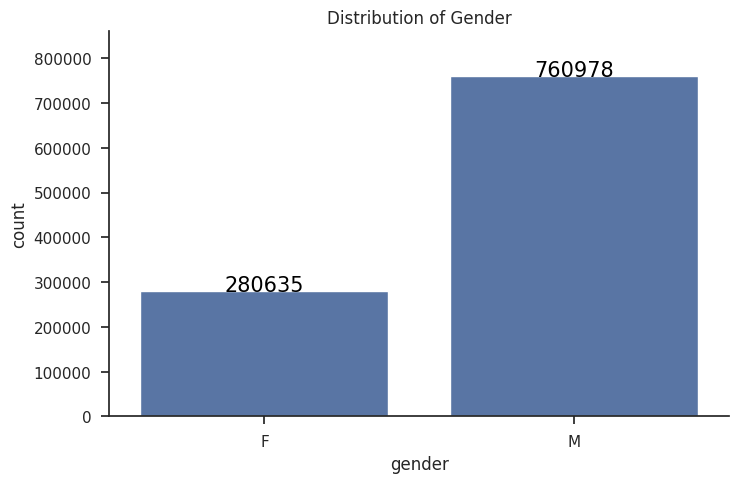

In [ ]:
countplot(bank_data, x = 'gender', title = "Distribution of Gender")

The number of transaction made by the males are almost thrice to the number of transaction made by the Females.

**defining a function for the bar graph.**

In [ ]:


def bar_plot(data_frame, x, y, title, hue = None, order_by = None):
  plt.figure(figsize = (10,5))
  ax = sns.barplot(data_frame, x = x, y = y, hue = hue, order = order_by,  palette = 'rocket')

  for p in ax.patches:
      x = p.get_x() + p.get_width()/2
      y = p.get_height() + 1
      ax.annotate(text = '{:.2f}%'.format(p.get_height()), xy=(x, y), ha='center', size = 8, color = 'black')

  ax.margins(y = 0.3)
  plt.title(title)
  plt.xticks(rotation = 25)
  plt.show()


Filtering the top 15 location at which the frequency of transaction is high.

In [ ]:
tran_loc = bank_data[['loc']].value_counts().reset_index(name = 'count')
tran_loc['per'] = tran_loc['count']/tran_loc['count'].sum()*100
tran_loc = tran_loc.sort_values(by = 'per', ascending = False)

In [ ]:
tran_loc  = tran_loc.iloc[:15]
tran_loc

,loc,count,per
0,MUMBAI,101997,9.792216
1,NEW DELHI,84143,8.078144
2,BANGALORE,81330,7.808082
3,GURGAON,73594,7.065388
4,DELHI,70549,6.773053
5,NOIDA,32656,3.135138
6,CHENNAI,29839,2.864692
7,PUNE,25690,2.466367
8,HYDERABAD,22976,2.205810
9,THANE,21397,2.054218


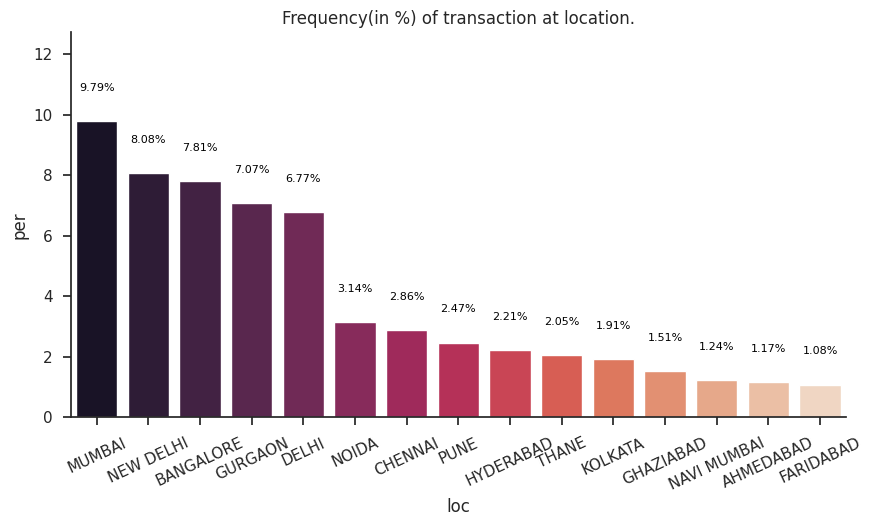

In [ ]:
bar_plot(tran_loc, x = 'loc', y = 'per', title = 'Frequency(in %) of transaction at location.')

Most of the transaction made by the coustmers are in metro cities.

**Number(%) of Transaction in month**

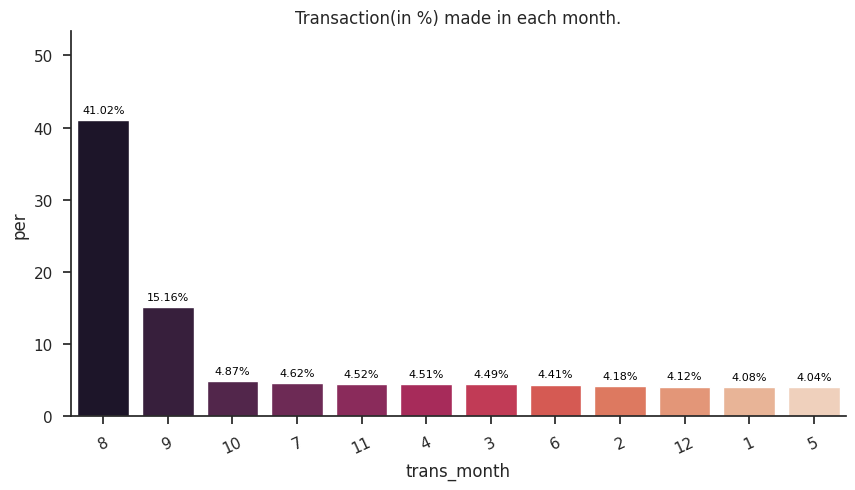

In [ ]:
transaction_by_month = bank_data['trans_month'].value_counts().reset_index(name = 'count')
transaction_by_month['per'] = transaction_by_month['count']/transaction_by_month['count'].sum()*100
order_by = transaction_by_month.sort_values(by = 'per', ascending = False)['trans_month']

bar_plot(transaction_by_month, x = 'trans_month', y = 'per',order_by = order_by, title = 'Transaction(in %) made in each month.')

The month of August records the highest number of transaction made by customers and the may records the least.

**Number(%) of transaction in hours**

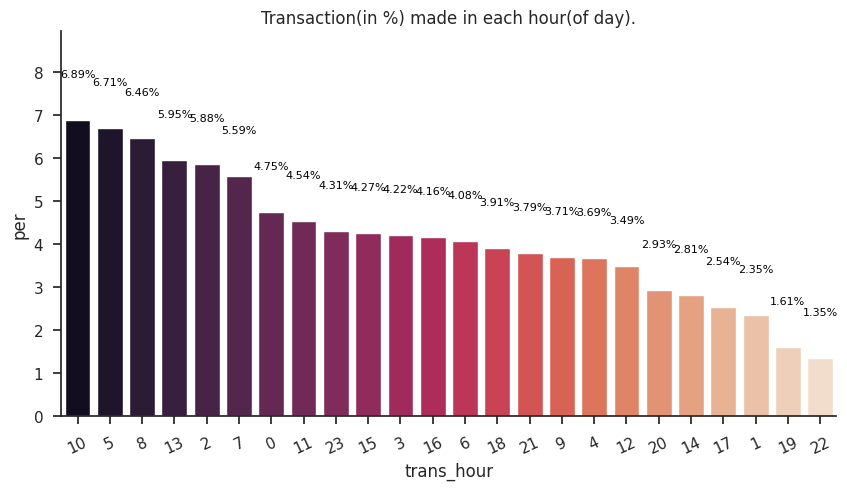

In [ ]:
transaction_by_hours = bank_data['trans_hour'].value_counts().reset_index(name = 'count')
transaction_by_hours['per'] = transaction_by_hours['count']/transaction_by_hours['count'].sum()*100
order_by = transaction_by_hours.sort_values(by = 'per', ascending = False)['trans_hour']

bar_plot(transaction_by_hours, x = 'trans_hour', y = 'per',order_by = order_by, title = 'Transaction(in %) made in each hour(of day).')

most of the transaction were happened between morning to evening.

**Grouping the Transaction amount by month and gender**

In [ ]:
transaction_amount_by_month = bank_data.groupby(['trans_month', 'gender'])['trans_amount'].agg(['sum', 'count', 'mean']).reset_index()
transaction_amount_by_month

,trans_month,gender,sum,count,mean
0,1,F,1.711526e+07,11374,1504.770349
1,1,M,4.496888e+07,31082,1446.782090
2,2,F,1.752875e+07,11751,1491.681320
3,2,M,4.898860e+07,31754,1542.753655
4,3,F,2.249235e+07,12884,1745.758560
5,3,M,5.311215e+07,33854,1568.858806
6,4,F,2.081231e+07,12825,1622.791847
7,4,M,5.995806e+07,34130,1756.755486
8,5,F,1.894946e+07,11133,1702.098137
9,5,M,4.849942e+07,30932,1567.936625


**Function for plotting the line graph**

In [ ]:
def line_plot(data_frame, x, y1, y2, title = None, title1 = None, title2 = None, hue = None):
  fig, axs = plt.subplots(2,1, sharex=True, figsize = (10,8))
  fig.suptitle(title)
  sns.lineplot(data_frame, x = x, y = y1,markers = True, hue = hue, style = hue, ax = axs[0])
  axs[0].set_title(title1)
  sns.lineplot(data_frame, x= x, y = y2,markers = True, hue = hue, style = hue, ax = axs[1])
  axs[1].set_title(title2)
  plt.show()

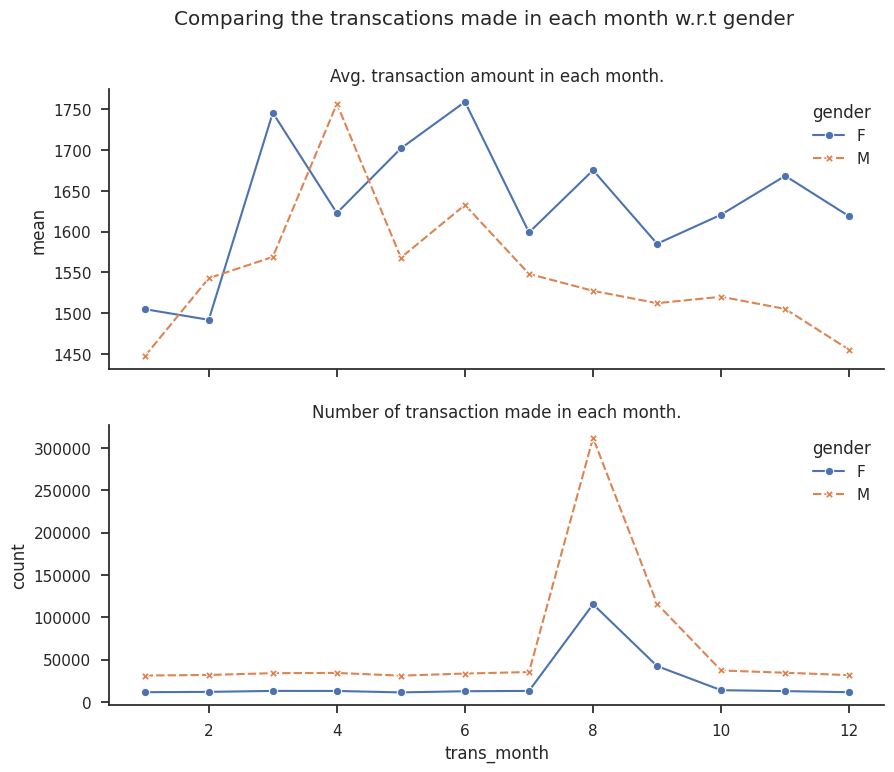

In [ ]:
line_plot(data_frame = transaction_amount_by_month, x = 'trans_month', y1 = 'mean', y2 = 'count', hue = 'gender',
          title = "Comparing the transcations made in each month w.r.t gender",
          title1 = "Avg. transaction amount in each month.",
          title2= "Number of transaction made in each month.")

From the above figure we can conclude that frequency of transaction by males are higher than females but the amount transactioned by females are higher than men except month 2 and 4. this shows us that females are likely to withdraw more money than males in each transaction.

**Lets group the transaction amount by transaction hour and gender**

In [ ]:
transaction_amount_by_hour = bank_data.groupby(['trans_hour', 'gender'])['trans_amount'].agg(['sum', 'count', 'mean']).reset_index()
transaction_amount_by_hour

,trans_hour,gender,sum,count,mean
0,0,F,24204062.85,14224,1701.635465
1,0,M,62386400.40,35235,1770.580400
2,1,F,5835663.86,5503,1060.451365
3,1,M,23130856.17,19003,1217.221290
4,2,F,27894971.53,17742,1572.256314
5,2,M,76015949.68,43453,1749.383234
6,3,F,21900782.38,12849,1704.473685
7,3,M,52125161.69,31147,1673.521100
8,4,F,14268923.06,9871,1445.539769
9,4,M,37911916.94,28548,1328.006058


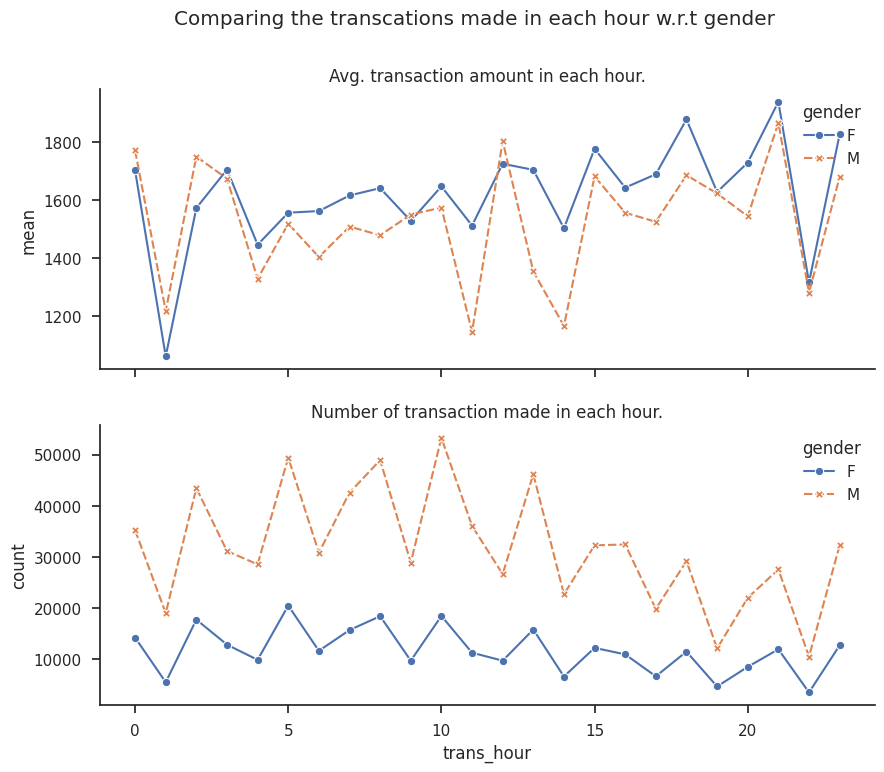

In [ ]:
line_plot(data_frame = transaction_amount_by_hour, x = 'trans_hour', y1 = 'mean', y2 = 'count', hue = 'gender',
          title = "Comparing the transcations made in each hour w.r.t gender",
          title1 = "Avg. transaction amount in each hour.",
          title2= "Number of transaction made in each hour.")

Transaction by hours also show the same trend of customers as the transaction by month

In [ ]:
#function for hist plot and box plot

def hist_box_plot(data_frame, x, hue = None, title = None):
  fig, axs = plt.subplots(2,1, figsize = (10,8))
  fig.subplots_adjust(hspace = 0.5)
  sns.histplot(data_frame, x = x, bins = 20, kde = True, hue = hue, ax = axs[0])
  sns.boxplot(data_frame, x = x, hue = hue, fill=False, gap=.1, ax = axs[1])
  axs[0].set_title(f'Distribution of {x} w.r.t {hue}')
  axs[1].set_title(f'Boxplot of {x}')
  plt.show()

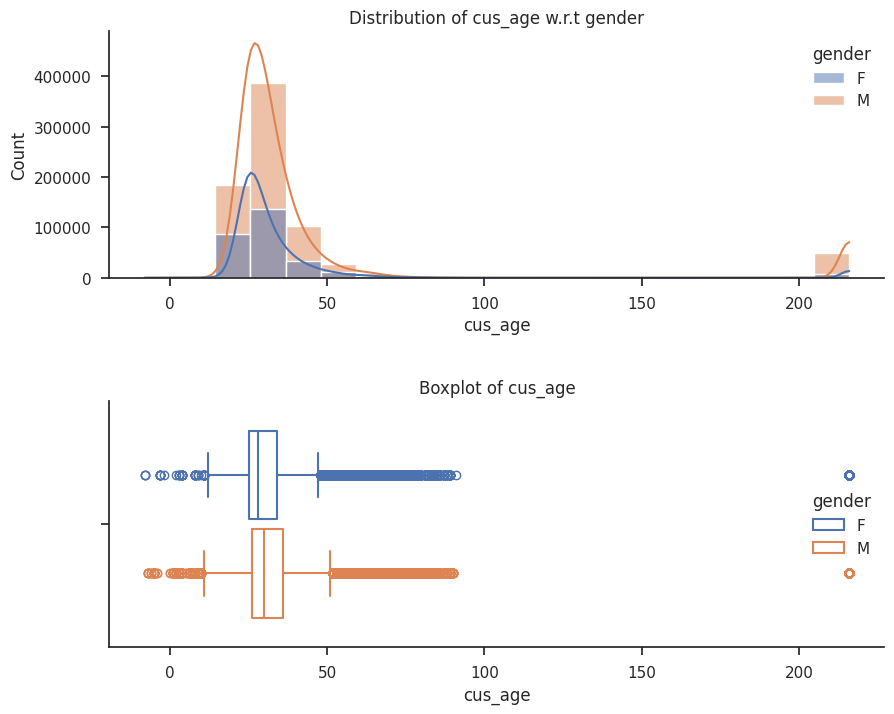

In [ ]:
hist_box_plot(bank_data, x = 'cus_age', hue  = 'gender')

Clearly we have outliers in age distribution no one live for 200 years. its an exception, we can remove those data points.

lets see how many data points lies in outlier.


In [ ]:
Q1 = bank_data['cus_age'].quantile(0.25)
Q3 = bank_data['cus_age'].quantile(0.75)
IQR = Q3 - Q1

# lets identify the outliers

outliers  = bank_data[(bank_data['cus_age'] < (Q1 - 1.5 * IQR)) | (bank_data['cus_age'] > (Q3 + 1.5 * IQR))]

print(f'There are {len(outliers)} data points in outlier.')

There are 88589 data points in outlier.


In [ ]:
bank_data_no_outliers = bank_data[~((bank_data['cus_age'] < (Q1 - 1.5 * IQR)) | (bank_data['cus_age'] > (Q3 + 1.5 * IQR)))]

print(f'After removing outliers we have {len(bank_data_no_outliers)} data points.')

After removing outliers we have 953024 data points.


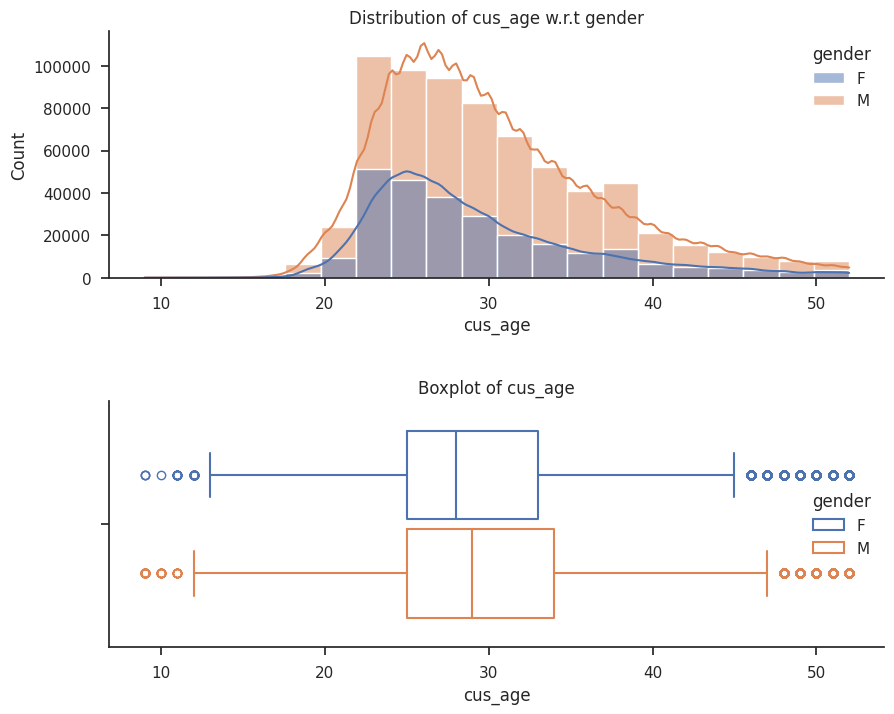

In [ ]:
# lets plot the new cus_age data.
hist_box_plot(bank_data_no_outliers, x = 'cus_age', hue  = 'gender')

Most of the customers age fall in the range of 20 to 40 years.

****

We know that most of the customers have done multiple transcation, so we can group  them together, as we are segmenting the customers.

In [ ]:
group_data = bank_data_no_outliers.groupby('CustomerID').agg({'trans_amount': 'mean', 'acc_balance': 'mean',
                                                              'TransactionID': 'count', 'gender': 'first',
                                                              'loc': 'first', 'cus_age': 'first',
                                                              'trans_month': 'first', 'trans_hour': 'first'}).reset_index()

group_data.head()

,CustomerID,trans_amount,acc_balance,TransactionID,gender,loc,cus_age,trans_month,trans_hour
0,C1010011,2553.0,76340.635,2,F,NOIDA,24,9,10
1,C1010012,1499.0,24204.490,1,M,MUMBAI,22,8,8
2,C1010014,727.5,100112.950,2,F,MUMBAI,24,1,18
3,C1010018,30.0,496.180,1,F,CHAMPARAN,26,9,23
4,C1010024,5000.0,87058.650,1,M,KOLKATA,51,8,15


Now here TransactionID become the frequency of the transection of customers.

SO we will change the name of the TransactionID to frequency.

In [ ]:
group_data.rename(columns = {'TransactionID': "frequency"}, inplace = True)
group_data.drop('CustomerID',axis = 1, inplace = True)
group_data.head()

,trans_amount,acc_balance,frequency,gender,loc,cus_age,trans_month,trans_hour
0,2553.0,76340.635,2,F,NOIDA,24,9,10
1,1499.0,24204.490,1,M,MUMBAI,22,8,8
2,727.5,100112.950,2,F,MUMBAI,24,1,18
3,30.0,496.180,1,F,CHAMPARAN,26,9,23
4,5000.0,87058.650,1,M,KOLKATA,51,8,15


Lets remove the data where the transaction amount is higher than the account balance.

In [ ]:
print(f'We have {len(group_data[(group_data["acc_balance"] - group_data["trans_amount"]) < 0])} data points where the transaction amount is higher than the account balance.')

We have 71343 data points where the transaction amount is higher than the account balance.


In [ ]:
#removing these data
cleaned_group_data = group_data[~((group_data["acc_balance"] - group_data["trans_amount"]) < 0)]
print(f'After removing these data we have {len(cleaned_group_data)} data points')

After removing these data we have 744384 data points


**Encoding the categorical data**<br>

we have two columns<b>('gender', 'loc')</b> which have categorical value we need to change these values into numerical form.

In [ ]:
# initialising the label encoder

le = LabelEncoder()

cleaned_group_data['gender'] = le.fit_transform(cleaned_group_data['gender'])
cleaned_group_data['loc'] = le.fit_transform(cleaned_group_data['loc'])

cleaned_group_data.head()

,trans_amount,acc_balance,frequency,gender,loc,cus_age,trans_month,trans_hour
0,2553.0,76340.635,2,0,4579,24,9,10
1,1499.0,24204.490,1,1,4118,22,8,8
2,727.5,100112.950,2,0,4118,24,1,18
3,30.0,496.180,1,0,1199,26,9,23
4,5000.0,87058.650,1,1,3340,51,8,15


In [ ]:
cleaned_group_data.describe()

,trans_amount,acc_balance,frequency,gender,loc,cus_age,trans_month,trans_hour
count,744384.000000,7.443840e+05,744384.000000,744384.000000,744384.000000,744384.000000,744384.000000,744384.000000
mean,1225.454288,1.018924e+05,1.180705,0.718832,3199.725690,30.125720,7.293901,10.419623
std,4063.396215,6.213441e+05,0.440720,0.449570,1843.143389,6.801767,2.652268,6.488775
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,9.000000,1.000000,0.000000
25%,170.377500,7.542770e+03,1.000000,0.000000,1624.000000,25.000000,6.000000,5.000000
50%,445.000000,2.045433e+04,1.000000,1.000000,3133.000000,29.000000,8.000000,10.000000
75%,1082.000000,6.149926e+04,1.000000,1.000000,4511.000000,34.000000,9.000000,15.000000
max,543699.360000,1.150355e+08,6.000000,1.000000,7248.000000,52.000000,12.000000,23.000000


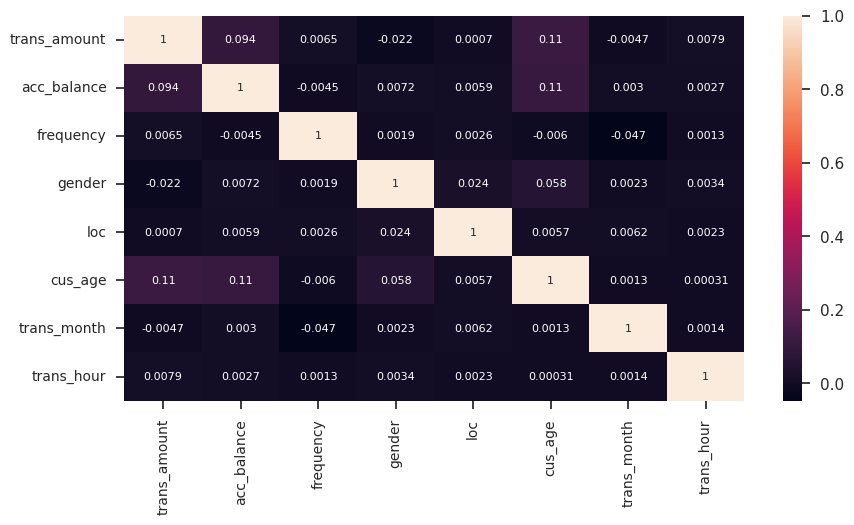

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    cleaned_group_data.corr(),
    annot=True,
    annot_kws={'size': 8}
)
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

We have done EDA, dalta cleaning, Data Enginnering. now we need to scale the data.

In [ ]:
min_max = MinMaxScaler()
stand = StandardScaler()

scaled_data = cleaned_group_data.copy()

scaled_data[['frequency', 'gender', 'loc', 'cus_age', 'trans_month', 'trans_hour']] = min_max.fit_transform(cleaned_group_data[['frequency', 'gender', 'loc', 'cus_age',
                                                                                                                        'trans_month', 'trans_hour']])
scaled_data[['trans_amount', 'acc_balance']] = stand.fit_transform(cleaned_group_data[['trans_amount', 'acc_balance']])

In [ ]:
scaled_data.head()

,trans_amount,acc_balance,frequency,gender,loc,cus_age,trans_month,trans_hour
0,0.326709,-0.041123,0.2,0.0,0.631760,0.348837,0.727273,0.434783
1,0.067320,-0.125032,0.0,1.0,0.568157,0.302326,0.636364,0.347826
2,-0.122546,-0.002864,0.2,0.0,0.568157,0.348837,0.000000,0.782609
3,-0.294201,-0.163189,0.0,0.0,0.165425,0.395349,0.727273,1.000000
4,0.928915,-0.023874,0.0,1.0,0.460817,0.976744,0.636364,0.652174


### Dimensonality Reduction

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.
 we will use PCA for this.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [ ]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
pca_data = pd.DataFrame(pca.transform(scaled_data), columns = (["col1","col2", "col3"]))
pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,744384.0,-2.309982e-18,1.046268,-0.338715,-0.277296,-0.203235,-0.024776,135.388911
col2,744384.0,5.822681e-19,0.951871,-92.622492,-0.033982,0.062989,0.100584,130.779792
col3,744384.0,-4.104513e-17,0.449578,-1.022658,-0.709199,0.275822,0.282890,1.732038


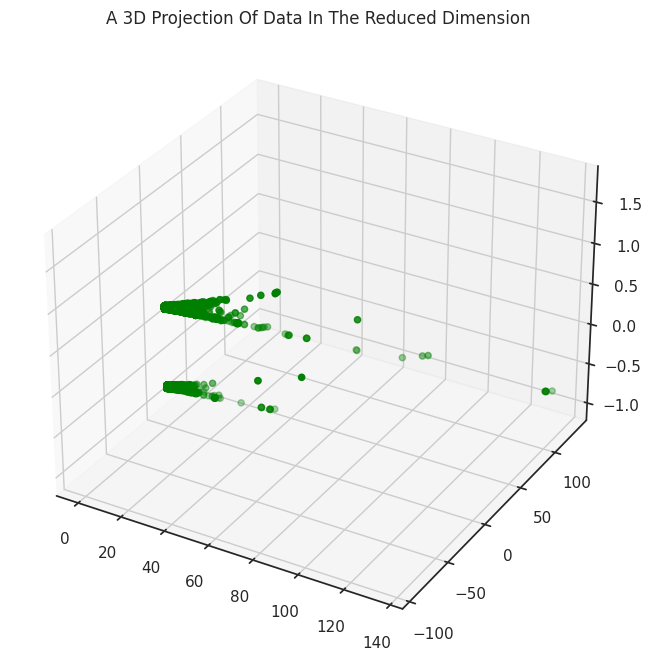

In [ ]:
#A=lets plot a 3D Projection Of Data In The Reduced Dimension
x = pca_data["col1"]
y = pca_data["col2"]
z = pca_data["col3"]

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x,y,z, c = "green", marker = "o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### Clustering


Now that i have reduced the attributes of data into three dimension. i will now perform clustering of data, for that i will be using Agglomerative clustring and Kmeans clustering.<br>
<b>Agglomerative clustering</b> is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.<br>
<b>K-means clustering</b> is a algorithm that groups data into clusters based on their distance from a cluster center, or centroid.
<br>
<b>Steps</b>
1. Detrmining the number of cluster with the help of Elbow method.
2. performing clustering via Agglomerative and Kmeans clustering.
3. plotting the clusters formed on scatter plot.

Determining the number of cluster with the help of Elbow method:


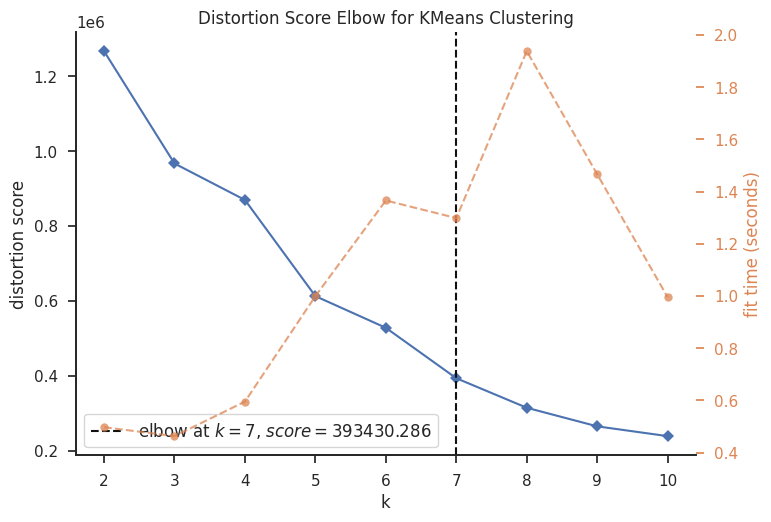

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Determining the number of cluster with the help of Elbow method:')
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(pca_data)
elbow.show()

The above figure indicates that 6 will be an optimal number of clusters for this data.
Next, we will be fitting the Agglomerative and Kmeans Clustering Model to get the final clusters.

In [ ]:
#Initiating the Agglomerative Clustering model.

KM = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# fit model and predict clusters
predicted_cluster = KM.fit_predict(pca_data)
pca_data["Clusters"] = predicted_cluster
#Adding the Clusters feature to the orignal dataframe.
cleaned_group_data["Clusters"] = predicted_cluster

Let's plot the 3D Distribution of clusters to examine the clusters.

In [ ]:
cmap = colors.ListedColormap(["#1a10e3", "#ed0c05", "#10e01e", "#abad07", "#9F8A78", "#F3AB60"])

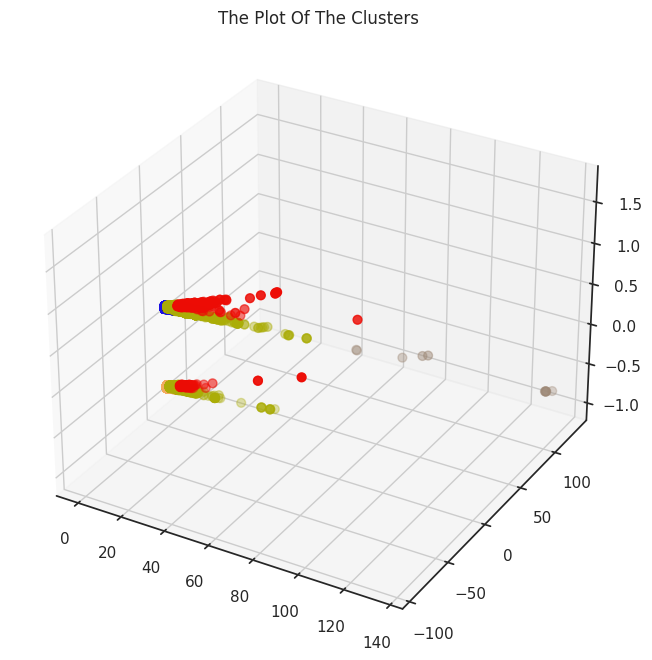

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c = pca_data["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()


### Evaluating Model

As this problem is unsupervised problem(there is no target variable). we can evaluate this by schilloute score or sum of squared error.

Here we will loos at the patterns in the clusters formed and determine the nature of the clusters' patterns.

we will do so by EDA(clusters formed in data attributes).

**Distribution of the clusters.**

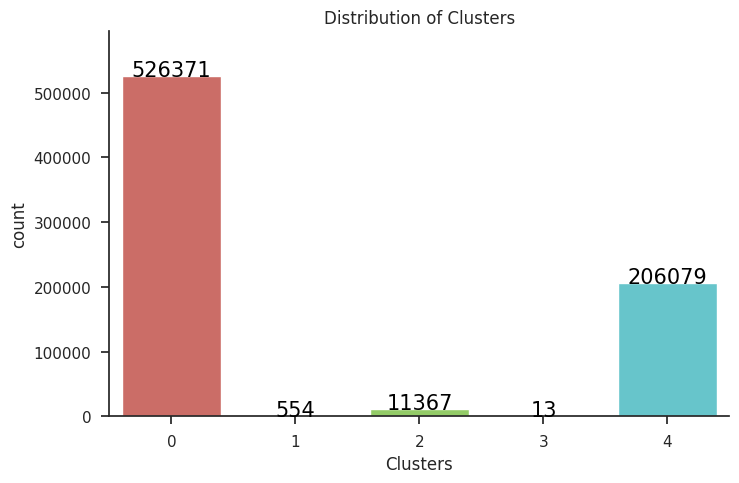

In [ ]:
countplot(cleaned_group_data, x = 'Clusters', title = "Distribution of Clusters", palette = sns.color_palette('hls', 8))

The above cluster distribution shows that the majority of our customers fall in two clusters(cluster 0 and cluster 1).


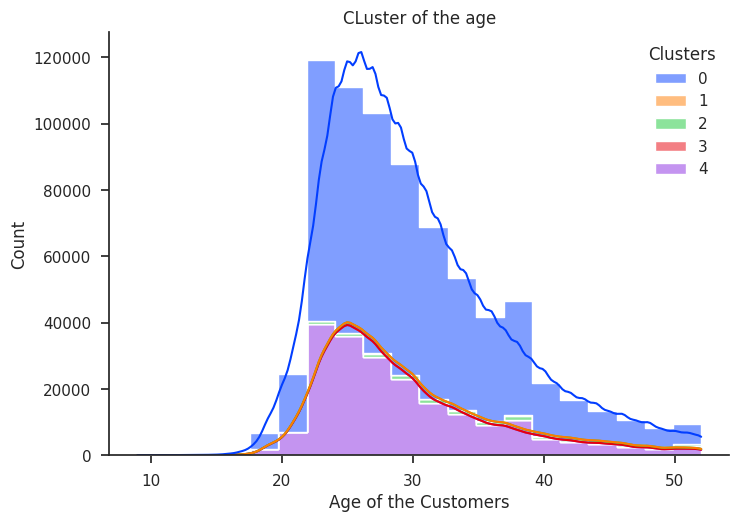

In [ ]:
plt.figure()
pl = sns.histplot(x=cleaned_group_data["cus_age"], bins = 20, kde = True, element="step", multiple="stack",
                  hue = cleaned_group_data["Clusters"], palette = sns.color_palette("bright"))
pl.set_title("CLuster of the age")
pl.set_xlabel("Age of the Customers")
plt.show()

plotting the cluster between the acc_balance and the transaction amount.

<Axes: xlabel='acc_balance', ylabel='trans_amount'>

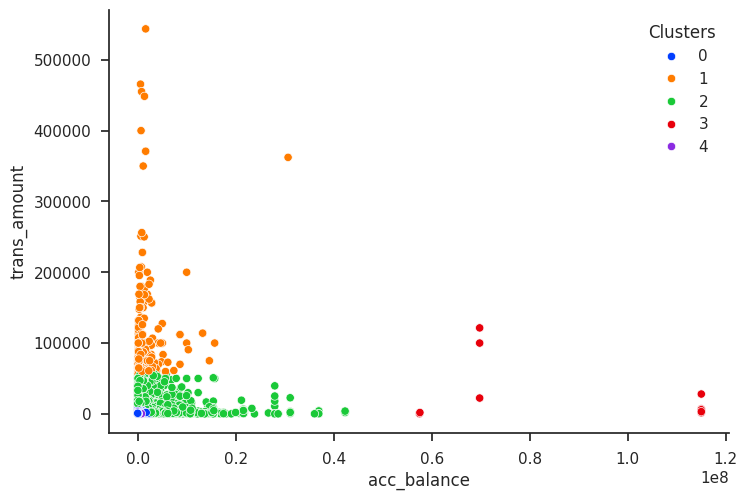

In [ ]:
sns.scatterplot(cleaned_group_data, x = 'acc_balance', y = 'trans_amount', hue = 'Clusters', palette = sns.color_palette('bright'))

**Acc_balance vs transaction amount shows us the clusters.**

1.   Cluster 0: Customers who have low account balance and the low transaction amount.
2.   Cluster 1: Customers who have low account balance but the transaction amount is high
3.  Cluster 2: Customers who have low to mid account balance and the transaction amount is low.
4. Cluster 3: Customers having high account balance but low transaction amount.
5. Cluster 4: Customers who doesn't keep there money in banks or keep less money.



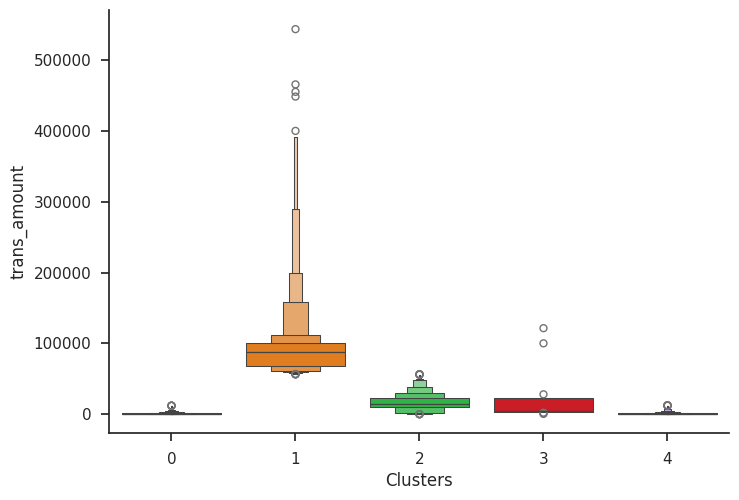

In [ ]:
plt.figure()
#pl=sns.swarmplot(x=cleaned_group_data["Clusters"], y=cleaned_group_data["trans_amount"], color= "#CBEDDD", alpha=0.5 )
sns.boxenplot(x = cleaned_group_data["Clusters"], y = cleaned_group_data["trans_amount"], palette=sns.color_palette('bright'))
plt.show()

From the above figure we can conclude that cluater 1 is the biggest cluster followed by cluster 2.